In [16]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [17]:
import pandas as pd #데이터 프레임(테이블)을 쉽게 다룰 수 있게 하는 라이브러리
from sklearn.preprocessing import LabelEncoder #데이터 전처리
from sklearn import tree
import graphviz #graphtical하게 보여줌

# 데이터 경로
file_path = "/gdrive/MyDrive/colab/dt/PlayTennis.csv"
# 데이터 경로로부터 파일을 읽음 (pandas 라이브러리 사용)
datas = pd.read_csv(file_path) #읽어올 파일 이름

# 데이터 출력 (데이터 형태 확인)
print(datas)

     outlook  temp humidity  windy  day      time play
0      sunny   hot     high  False  Sun  09-22-10   no
1      sunny   hot     high   True  Sun  16-00-05   no
2   overcast   hot     high  False  Tue  12-25-54  yes
3      rainy  mild     high  False  Wed  07-17-02  yes
4      rainy  cool   normal  False  Thu  08-22-56  yes
5      rainy  cool   normal   True  Thu  14-25-25   no
6   overcast  cool   normal   True  Mon  20-00-17  yes
7      sunny  mild     high  False  Fri  19-25-11   no
8      sunny  cool   normal  False  Sat  08-22-22  yes
9      rainy  mild   normal  False  Fri  11-24-55  yes
10     sunny  mild   normal   True  Sat  17-55-24  yes
11  overcast  mild     high   True  Tue  06-25-58  yes
12  overcast   hot   normal  False  Tue  16-44-45  yes
13     rainy  mild     high   True  Fri  23-29-28   no


In [18]:
# 데이터 변환 (문자열->숫자)
# 대부분의 decision tree 라이브러리들이 숫자를 입력으로 받음
# 범주형 데이터를 수치형 데이터로 자동 변환해주는 라이브러리
label_encoder = LabelEncoder()

# 정답 클래스 이름 (yes, no)
target_names = label_encoder.fit(datas['play']).classes_ #밑에 거 거꾸로, 숫자로 부여한걸 문자열로
print("target_names : {}".format(target_names))

#fit_transform: 문자열들 다 가져오고 unique하게 몇개정도 있는지 파악하고 0,1,2로 바꿈(ex. sunny, rainy, cloudy)
datas['outlook'] = label_encoder.fit_transform(datas['outlook']) #outlook 한 줄을 쭉 가져옴 
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
#datas['day'] = label_encoder.fit_transform(datas['day'])
#datas['time'] = label_encoder.fit_transform(datas['time'])
datas['play'] = label_encoder.fit_transform(datas['play'])

#일주일중 휴일인 토요일, 일요일과 주말 전날인 금요일을 dayoff로 지정하고 그 외의 요일들은 평일로 지정
datas.loc[datas.day == 'Fri', 'day'] = 'dayoff'
datas.loc[datas.day == 'Sat', 'day'] = 'dayoff'
datas.loc[datas.day == 'Sun', 'day'] = 'dayoff'
datas.loc[datas.day != 'dayoff', 'day'] = 'weekday'

datas['day'] = label_encoder.fit_transform(datas['day'])
# 데이터 출력 (데이터 포맷 변환 후 결과 확인)
print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  day      time  play
0         2     1         0      0    0  09-22-10     0
1         2     1         0      1    0  16-00-05     0
2         0     1         0      0    1  12-25-54     1
3         1     2         0      0    1  07-17-02     1
4         1     0         1      0    1  08-22-56     1
5         1     0         1      1    1  14-25-25     0
6         0     0         1      1    1  20-00-17     1
7         2     2         0      0    0  19-25-11     0
8         2     0         1      0    0  08-22-22     1
9         1     2         1      0    0  11-24-55     1
10        2     2         1      1    0  17-55-24     1
11        0     2         0      1    1  06-25-58     1
12        0     1         1      0    1  16-44-45     1
13        1     2         0      1    0  23-29-28     0


In [19]:
df_split = datas.time.str.split('-')
df_list= pd.DataFrame(df_split.tolist(),columns=["h","m","s"])
df_list = df_list.apply(pd.to_numeric)

# df_list['result']="blank"

# df_list.loc[(5<df_list['h'])&(df_list['h']<11),'result']="morning"
# df_list.loc[(11<df_list['h'])&(df_list['h']<17),'result']="lunch"
# df_list.loc[(17<df_list['h'])&(df_list['h']<23),'result']="dinner"
# df_list.loc[(df_list['h']!="morning")|(df_list['h']!="lunch")|(df_list['h']!="dinner"),'result']="dawn"

#시간대별로 아침, 점심, 저녁, 새벽으로 나누기
#데이터셋에는 새벽시간대가 없어 아침, 점심, 저녁으로만 나누어졌다
df_list['result'] = "blank"
df_list.loc[(5<=df_list['h'])&(df_list['h']<=11), 'result'] = 'morning'
df_list.loc[(12<=df_list['h'])&(df_list['h']<=17), 'result'] = 'lunch'
df_list.loc[(18<=df_list['h'])&(df_list['h']<=23), 'result'] = 'dinner'
df_list.loc[(df_list['result']!="morning")&(df_list['result']!="lunch")&(df_list['result']!="dinner"),'result']='dawn'

datas['time']= df_list['result']
datas['time'] = label_encoder.fit_transform(datas['time'])


print(datas)


    outlook  temp  humidity  windy  day  time  play
0         2     1         0      0    0     2     0
1         2     1         0      1    0     1     0
2         0     1         0      0    1     1     1
3         1     2         0      0    1     2     1
4         1     0         1      0    1     2     1
5         1     0         1      1    1     1     0
6         0     0         1      1    1     0     1
7         2     2         0      0    0     0     0
8         2     0         1      0    0     2     1
9         1     2         1      0    0     2     1
10        2     2         1      1    0     1     1
11        0     2         0      1    1     2     1
12        0     1         1      0    1     1     1
13        1     2         0      1    0     0     0


In [20]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     2
1         2     1         0      1    0     1
2         0     1         0      0    1     1
3         1     2         0      0    1     2
4         1     0         1      0    1     2
5         1     0         1      1    1     1
6         0     0         1      1    1     0
7         2     2         0      0    0     0
8         2     0         1      0    0     2
9         1     2         1      0    0     2
10        2     2         1      1    0     1
11        0     2         0      1    1     2
12        0     1         1      0    1     1
13        1     2         0      1    0     0

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [21]:
# Decision tree 모델 학습 ()
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy') #entropy 기준으로 트리를 구성해라
train_result = decision_tree.fit(x_data, y_data) #fit을 통해 x데이터, y데이터 넣어줌

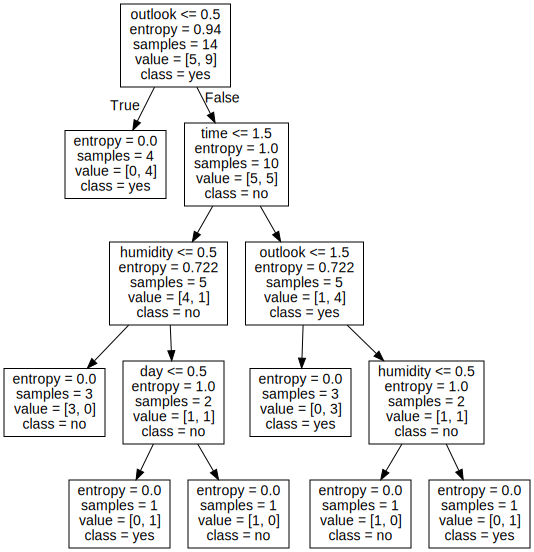

In [22]:
# 학습 결과 확인 (graphviz 라이브러리 사용)
#tree형태로 학습한 결과를 가지고 보여줘라
#feature(네모 안)에는 x_data 열을 넣어라
graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [23]:
# 학습한 모델을 사용하여 예측(predict method)
# closed test?? open test??
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool


데이터 전처리를 할 때 요일의 경우 비교적 사람들이 운동을 하기 쉬운 날인 dayoff와 하기 쉽지 않은 날인 weekday로 나누었다. 기준은 주말과 주말 전날인 금요일을 dayoff로 지정했고 그 외의 요일들은 weekday로 지정했다.
시간의 경우 05시부터 11시까지는 아침, 12시부터 17시까지는 점심, 18시부터 23시까지는 저녁, 그 외의 시간대는 새벽으로 나누어 지정했다. 이번 데이터셋에는 새벽 시간대가 없어 아침, 점심, 저녁 시간대로만 구분되어 전처리됐다.
